# Import libraries

In [1]:
import numpy as np
import pandas as pd
import random
import os
import matplotlib.pyplot as plt
from matplotlib.image import imread
from numpy.linalg import inv
import skimage.io as io

# Dataset Downloads

In [2]:
dataset_path = "/home/sysadm/Downloads/"


The picture of band1 is


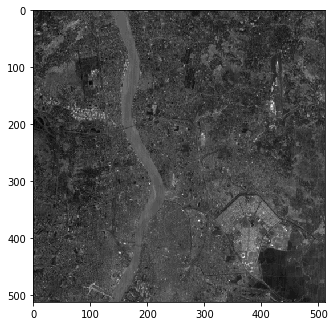

----------------------------------------------------------------------------------------------------
The picture of band2 is


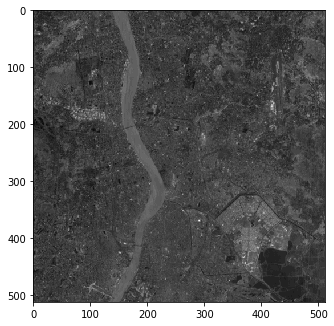

----------------------------------------------------------------------------------------------------
The picture of band3 is


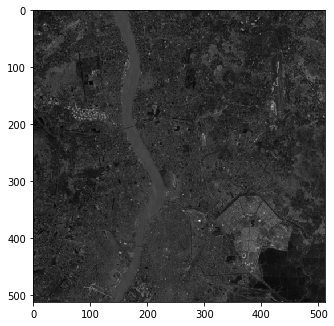

----------------------------------------------------------------------------------------------------
The picture of band4 is


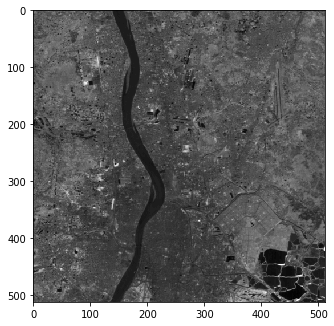

----------------------------------------------------------------------------------------------------


In [3]:
image_arr = np.ndarray(shape = (512,512,4))

for i in range(4):
    img = plt.imread(dataset_path + 'band' + str(i+1)+ '.gif')
    image_arr[:,:,i] = np.array(img[:,:,0])
    plt.subplot(1,1,1)
    print('The picture of band' + str(i+1)+ ' '+ 'is')
    plt.imshow(image_arr[:,:,i],cmap = 'gray')
    plt.subplots_adjust(right = 0.8, top = 2)
    plt.show()
    print('-'*100)

In [4]:
print(image_arr)

[[[41. 27. 26. 42.]
  [41. 27. 29. 41.]
  [38. 25. 26. 40.]
  ...
  [41. 27. 27. 32.]
  [41. 28. 27. 33.]
  [41. 28. 28. 33.]]

 [[41. 26. 26. 43.]
  [42. 27. 27. 43.]
  [41. 27. 28. 42.]
  ...
  [44. 30. 30. 33.]
  [41. 28. 32. 33.]
  [41. 28. 28. 33.]]

 [[41. 26. 26. 43.]
  [43. 27. 26. 43.]
  [39. 26. 27. 41.]
  ...
  [42. 28. 31. 35.]
  [40. 27. 32. 33.]
  [40. 28. 28. 33.]]

 ...

 [[39. 25. 23. 33.]
  [38. 24. 23. 31.]
  [38. 23. 21. 33.]
  ...
  [38. 22. 20. 22.]
  [39. 23. 19. 27.]
  [37. 23. 21. 24.]]

 [[40. 25. 24. 37.]
  [39. 24. 25. 33.]
  [40. 25. 24. 35.]
  ...
  [38. 23. 20. 23.]
  [39. 23. 19. 31.]
  [37. 22. 21. 22.]]

 [[41. 26. 25. 39.]
  [42. 27. 29. 38.]
  [42. 28. 29. 38.]
  ...
  [38. 22. 20. 25.]
  [38. 23. 19. 31.]
  [37. 22. 20. 22.]]]


In [5]:
image_arr.shape

(512, 512, 4)

In [6]:
band1 = io.imread("/home/sysadm/Downloads/band1.gif")
band1
print('intencity of band1 total region are: \n {}\n' .format(band1))

band2 = io.imread("/home/sysadm/Downloads/band2.gif")
band2
print('intencity of band2 total region are: \n {}\n' .format(band2))

band3 = io.imread("/home/sysadm/Downloads/band3.gif")
band3
print('intencity of band3 total region are: \n {}\n' .format(band3))

band4 = io.imread("/home/sysadm/Downloads/band4.gif")
band4
print('intencity of band4 total region are: \n {}\n' .format(band4))

intencity of band1 total region are: 
 [[41 41 38 ... 41 41 41]
 [41 42 41 ... 44 41 41]
 [41 43 39 ... 42 40 40]
 ...
 [39 38 38 ... 38 39 37]
 [40 39 40 ... 38 39 37]
 [41 42 42 ... 38 38 37]]

intencity of band2 total region are: 
 [[27 27 25 ... 27 28 28]
 [26 27 27 ... 30 28 28]
 [26 27 26 ... 28 27 28]
 ...
 [25 24 23 ... 22 23 23]
 [25 24 25 ... 23 23 22]
 [26 27 28 ... 22 23 22]]

intencity of band3 total region are: 
 [[26 29 26 ... 27 27 28]
 [26 27 28 ... 30 32 28]
 [26 26 27 ... 31 32 28]
 ...
 [23 23 21 ... 20 19 21]
 [24 25 24 ... 20 19 21]
 [25 29 29 ... 20 19 20]]

intencity of band4 total region are: 
 [[42 41 40 ... 32 33 33]
 [43 43 42 ... 33 33 33]
 [43 43 41 ... 35 33 33]
 ...
 [33 31 33 ... 22 27 24]
 [37 33 35 ... 23 31 22]
 [39 38 38 ... 25 31 22]]



# Define initial cluster

In [7]:
def init_cluster(self,k):
    s = np.random.randint(0,512,k)
    t = np.random.randint(0,512,k)
    b,c = list(s),list(t)
    x = 0
    while x < k:
        yield self[b[x],c[x]]
        x += 1

# Euclidean distance

In [8]:
def Euclidean_dist(A,B):
        distance = np.sum((np.array(A)-np.array(B))**2)**(1/2)
        return distance

In [9]:
def K_means_algo(self,k):
    s = list(init_cluster(self,k))
    s_new = np.zeros((k,4))
    D = np.zeros(shape=(512,512,k))
    cls = np.zeros(shape= (512,512,4))
    while True:
        for i in range(0,512):
            for j in range(0,512):
                for l in range(k):
                    D[i,j,l] = Euclidean_dist(self[i,j,:],s[l])
                cls[i,j,:] = np.argmin(D[i,j,:])
        
        for i in range(k):
            temp = self[cls == i]
            temp_mod = temp.reshape(int(len(temp)/4),4)
            s_new[i,] = np.mean(temp_mod,axis = 0)
        
        sd = np.zeros(k,)
        j= 0
        while j < k:
            sd[j,]= Euclidean_dist(s[j],s_new[j,])
            j+=1
        if (sd.all() < 0.00001 ) == True:
            break
        else:
            s = s_new.copy()
    return cls
               
    p,q = cls,s_new
    var = np.zeros(k,)
    i = 0
    while i < k:
        temp1 = self[p == i]
        temp1_mod = temp1.reshape(int(len(temp1)/4),4)
        j = 0
        sum = 0
        while j < len(temp1_mod):
            increment = (Euclidean_dist(temp1_mod[j,],q[i,]))**2
            sum +=increment
            j +=1
        var[i,] = sum /len(temp1_mod)
        i +=1
    return cls,var

# Define Algorithm

In [10]:
def K_means_var_algo(self,k):
    s = list(init_cluster(self,k))
    s_new = np.zeros((k,4))
    D = np.zeros(shape=(512,512,k))
    cls = np.zeros(shape= (512,512,4))
    while True:
        for i in range(0,512):
            for j in range(0,512):
                for l in range(k):
                    D[i,j,l] = Euclidean_dist(self[i,j,:],s[l])
                cls[i,j,:] = np.argmin(D[i,j,:])
        
        for i in range(k):
            temp = self[cls == i]
            temp_mod = temp.reshape(int(len(temp)/4),4)
            s_new[i,] = np.mean(temp_mod,axis = 0)
        
        sd = np.zeros(k,)
        j= 0
        while j < k:
            sd[j,]= Euclidean_dist(s[j],s_new[j,])
            j+=1
        if (sd.all() < 0.00001 ) == True:
            break
        else:
            s = s_new.copy()
            
    p,q = cls,s_new
    var = np.zeros(k,)
    i = 0
    while i < k:
        temp1 = self[p == i]
        temp1_mod = temp1.reshape(int(len(temp1)/4),4)
        j = 0
        sum = 0
        while j < len(temp1_mod):
            increment = (Euclidean_dist(temp1_mod[j,],q[i,]))**2
            sum +=increment
            j +=1
        var[i,] = sum /len(temp1_mod)
        i +=1
    return cls,var,np.sum(var)/len(var)
            
    

# Find the best cluster 

In [11]:
def best_cluster(image_arr,k,n):# n be the number of taking random initial centrioid 
    image_total = [0]*n
    for j in range(n):
        sum_var = np.zeros(n,)
        a,b,c = K_means_var_algo(image_arr,k)
        image_total[j] = a
        sum_var[j] = c   
    l = np.argmin(sum_var)
    bcp = image_total
    return bcp[l]

In [12]:
final_img2 = best_cluster(image_arr,2,4)
final_img2 

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [1., 1., 1., 1.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [1., 1., 1., 1.]],

       ...,

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        ...,
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[0., 0., 0., 0.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        ...,
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [1., 1., 1., 1.],
        [1., 1.

# K = 2

In [13]:
final_img2 = best_cluster(image_arr,2,10)
final_img2 

array([[[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        ...,
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [0., 0., 0., 0.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        ...,
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [0., 0., 0., 0.]],

       ...,

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[1., 1., 1., 1.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        ...,
        [0., 0., 0., 0.],
        [0., 0.

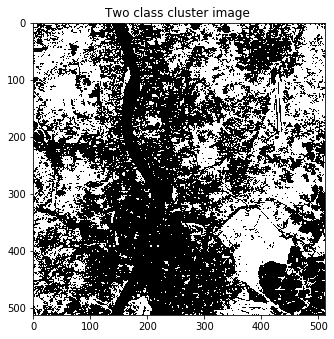

In [14]:
plt.imshow(final_img2[:,:,0],cmap = 'Greys_r')
plt.subplots_adjust(right = 0.8, top = 2)
plt.title("Two class cluster image ")
plt.show()


Colourful image

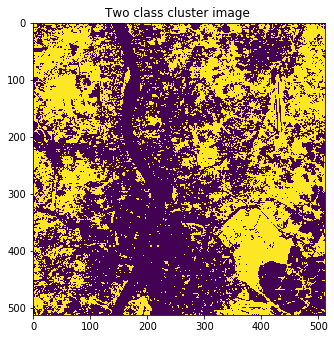

array([[255., 255., 255., ...,   0.,   0.,   0.],
       [255., 255., 255., ..., 255., 255.,   0.],
       [255., 255., 255., ..., 255., 255.,   0.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [255.,   0.,   0., ...,   0.,   0.,   0.],
       [255., 255., 255., ...,   0.,   0.,   0.]])

In [15]:
plt.imshow(final_img2[:,:,0]*np.floor((255/(2-1))))
plt.subplots_adjust(right = 0.8, top = 2)
plt.title("Two class cluster image ")
plt.show()   
final_img2[:,:,0]*np.floor((255/(2-1)))

# k = 3

In [16]:
final_img3 = best_cluster(image_arr,3,10)
final_img3

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [2., 2., 2., 2.],
        ...,
        [1., 1., 1., 1.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [2., 2., 2., 2.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [1., 1., 1., 1.],
        [2., 2., 2., 2.]],

       ...,

       [[2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.],
        ...,
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.],
        ...,
        [1., 1., 1., 1.],
        [2., 2., 2., 2.],
        [1., 1., 1., 1.]],

       [[2., 2., 2., 2.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [1., 1., 1., 1.],
        [2., 2.

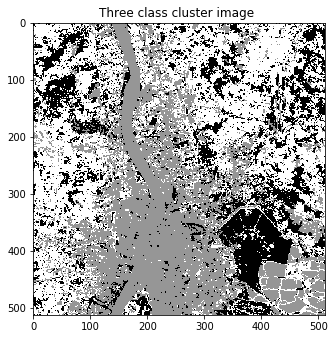

In [17]:
plt.imshow(final_img3[:,:,0],cmap = 'Greys_r')
plt.subplots_adjust(right = 0.8, top = 2)
plt.title("Three class cluster image ")
plt.show()


colourful image

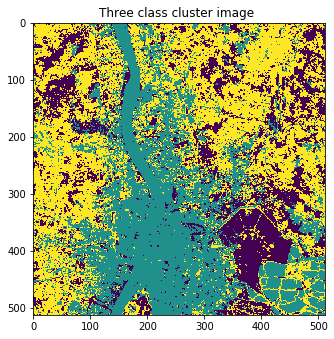

array([[  0.,   0., 254., ..., 127., 254., 254.],
       [  0.,   0.,   0., ...,   0.,   0., 254.],
       [  0.,   0.,   0., ...,   0., 127., 254.],
       ...,
       [254., 254., 254., ..., 127., 127., 127.],
       [254., 254., 254., ..., 127., 254., 127.],
       [254.,   0.,   0., ..., 127., 254., 127.]])

In [18]:
plt.imshow(final_img3[:,:,0]*np.floor((255/(3-1))))
plt.subplots_adjust(right = 0.8, top = 2)
plt.title("Three class cluster image ")
plt.show()   
final_img3[:,:,0]*np.floor((255/(3-1)))

# K = 4

In [19]:
final_img4 = best_cluster(image_arr,4,10)
final_img4

array([[[2., 2., 2., 2.],
        [3., 3., 3., 3.],
        [2., 2., 2., 2.],
        ...,
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[2., 2., 2., 2.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        ...,
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[2., 2., 2., 2.],
        [3., 3., 3., 3.],
        [2., 2., 2., 2.],
        ...,
        [3., 3., 3., 3.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       ...,

       [[2., 2., 2., 2.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[2., 2., 2., 2.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        ...,
        [0., 0., 0., 0.],
        [0., 0.

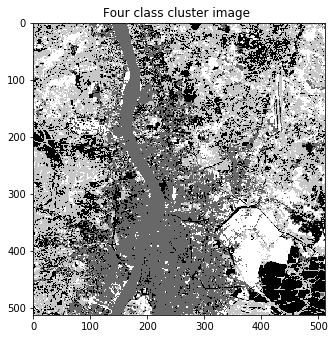

In [20]:
plt.imshow(final_img4[:,:,0],cmap = 'Greys_r')
plt.subplots_adjust(right = 0.8, top = 2)
plt.title("Four class cluster image ")
plt.show()


colourful image

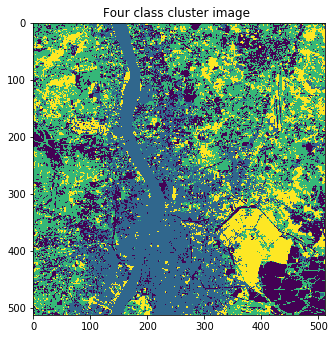

array([[  0.,   0., 170., ...,  85., 170., 170.],
       [  0.,   0.,   0., ...,   0.,   0., 170.],
       [  0.,   0.,   0., ...,   0.,  85., 170.],
       ...,
       [170., 170., 170., ...,  85.,  85.,  85.],
       [170., 170., 170., ...,  85., 170.,  85.],
       [170.,   0.,   0., ...,  85., 170.,  85.]])

In [21]:
plt.imshow(final_img4[:,:,0]*np.floor((255/(3-1))))
plt.subplots_adjust(right = 0.8, top = 2)
plt.title("Four class cluster image ")
plt.show()   
final_img3[:,:,0]*np.floor((255/(4-1)))

# K =5 

In [22]:
final_img5 = best_cluster(image_arr,5,10)
final_img5

array([[[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        ...,
        [4., 4., 4., 4.],
        [3., 3., 3., 3.],
        [4., 4., 4., 4.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        ...,
        [4., 4., 4., 4.],
        [4., 4., 4., 4.],
        [4., 4., 4., 4.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        ...,
        [2., 2., 2., 2.],
        [4., 4., 4., 4.],
        [3., 3., 3., 3.]],

       ...,

       [[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        ...,
        [0., 0., 0., 0.],
        [3., 3., 3., 3.],
        [0., 0., 0., 0.]],

       [[1., 1., 1., 1.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.],
        ...,
        [0., 0., 0., 0.],
        [3., 3.

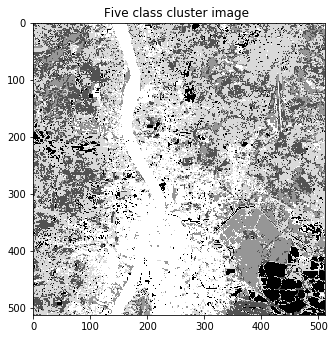

In [23]:
plt.imshow(final_img5[:,:,0],cmap = 'Greys_r')
plt.subplots_adjust(right = 0.8, top = 2)
plt.title("Five class cluster image ")
plt.show()


colourful image

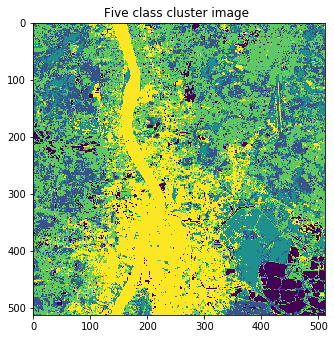

array([[ 85.,  85.,  85., ..., 340., 255., 340.],
       [ 85.,  85.,  85., ..., 340., 340., 340.],
       [ 85.,  85.,  85., ..., 170., 340., 255.],
       ...,
       [255., 255., 255., ...,   0.,   0.,   0.],
       [255., 255., 255., ...,   0., 255.,   0.],
       [ 85., 170., 170., ...,   0., 255.,   0.]])

In [24]:
plt.imshow(final_img5[:,:,0]*np.floor((255/(5-1))))
plt.subplots_adjust(right = 0.8, top = 2)
plt.title("Five class cluster image ")
plt.show()   
final_img5[:,:,0]*np.floor((255/(4-1)))

# k = 6

In [25]:
final_img6 = best_cluster(image_arr,6,10)
final_img6 

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.]],

       ...,

       [[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        ...,
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[0., 0., 0., 0.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        ...,
        [1., 1., 1., 1.],
        [3., 3., 3., 3.],
        [1., 1., 1., 1.]],

       [[0., 0., 0., 0.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.],
        ...,
        [1., 1., 1., 1.],
        [3., 3.

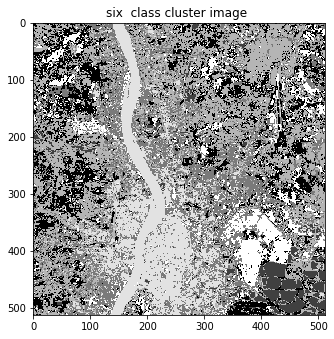

In [26]:
plt.imshow(final_img6[:,:,0],cmap = 'Greys_r')
plt.subplots_adjust(right = 0.8, top = 2)
plt.title("six  class cluster image ")
plt.show()


colourful image

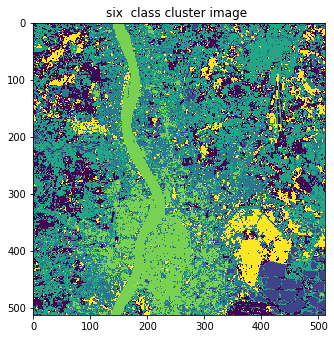

array([[  0.,   0.,   0., ..., 102., 102., 102.],
       [  0.,   0.,   0., ..., 102., 102., 102.],
       [  0.,   0.,   0., ..., 102., 102., 102.],
       ...,
       [153., 153., 153., ...,  51.,  51.,  51.],
       [  0., 153., 153., ...,  51., 153.,  51.],
       [  0., 102., 102., ...,  51., 153.,  51.]])

In [27]:
plt.imshow(final_img6[:,:,0]*np.floor((255/(6-1))))
plt.subplots_adjust(right = 0.8, top = 2)
plt.title("six  class cluster image ")
plt.show()   
final_img6[:,:,0]*np.floor((255/(6-1)))

# k =7 

In [28]:
final_img7 = best_cluster(image_arr,7,10)
final_img7 

array([[[1., 1., 1., 1.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [4., 4., 4., 4.],
        [4., 4., 4., 4.],
        [4., 4., 4., 4.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [0., 0., 0., 0.],
        ...,
        [4., 4., 4., 4.],
        [4., 4., 4., 4.],
        [4., 4., 4., 4.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [4., 4., 4., 4.],
        [4., 4., 4., 4.]],

       ...,

       [[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        ...,
        [6., 6., 6., 6.],
        [6., 6., 6., 6.],
        [6., 6., 6., 6.]],

       [[0., 0., 0., 0.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        ...,
        [6., 6., 6., 6.],
        [3., 3., 3., 3.],
        [6., 6., 6., 6.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [6., 6., 6., 6.],
        [3., 3.

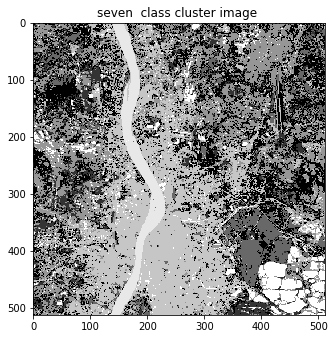

In [29]:
plt.imshow(final_img7[:,:,0],cmap = 'Greys_r')
plt.subplots_adjust(right = 0.8, top = 2)
plt.title("seven  class cluster image ")
plt.show()


colorful image

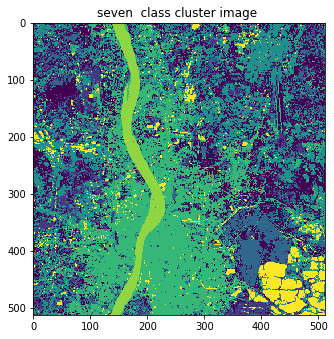

array([[ 42.,   0.,   0., ..., 168., 168., 168.],
       [ 42.,  42.,   0., ..., 168., 168., 168.],
       [ 42.,  42.,   0., ...,   0., 168., 168.],
       ...,
       [126., 126., 126., ..., 252., 252., 252.],
       [  0., 126., 126., ..., 252., 126., 252.],
       [  0.,   0.,   0., ..., 252., 126., 252.]])

In [30]:
plt.imshow(final_img7[:,:,0]*np.floor((255/(7-1))))
plt.subplots_adjust(right = 0.8, top = 2)
plt.title("seven  class cluster image ")
plt.show()   
final_img7[:,:,0]*np.floor((255/(7-1)))